## Import Library

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## Load Data

In [2]:
accident_df = pd.read_csv('US_Accidents_March23.csv')
accident_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


## Data Cleansing

In [3]:
# Transform the date fomat 
accident_df['Start_Time'] = pd.to_datetime(accident_df['Start_Time'],format='ISO8601')
accident_df['End_Time'] = pd.to_datetime(accident_df['End_Time'],format='ISO8601')

accident_df['Date'] = accident_df['Start_Time'].dt.date
accident_df['Date'] = pd.to_datetime(accident_df['Date'])

In [4]:
accident_df.County.value_counts()

County
Los Angeles        526851
Miami-Dade         251601
Orange             241275
Harris             181196
Dallas             157024
                    ...  
Mclean                  1
Poquoson (City)         1
Dewitt                  1
Frontier                1
Ness                    1
Name: count, Length: 1871, dtype: int64

In [5]:
# Select only LA for model building
accident_df = accident_df[accident_df.County == 'Los Angeles']
accident_df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date
42864,A-42865,Source2,3,2016-06-21 10:44:51,2016-06-21 11:24:00,34.321411,-118.496750,NaN,NaN,0.000,Right hand shoulder blocked due to accident on...,I-5 N,Sylmar,Los Angeles,CA,91342,US,US/Pacific,KWHP,2016-06-21 09:53:00,80.6,NaN,42.0,30.02,10.0,SE,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016-06-21
42865,A-42866,Source2,2,2016-06-21 10:44:12,2016-06-21 11:22:00,34.146858,-118.370384,NaN,NaN,0.000,Accident now on the shoulder on US-101 Southbo...,CA-170 S,North Hollywood,Los Angeles,CA,91602,US,US/Pacific,KBUR,2016-06-21 10:53:00,84.0,NaN,38.0,29.93,10.0,SE,8.1,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016-06-21
42866,A-42867,Source2,2,2016-06-21 10:46:30,2016-06-21 11:27:00,34.078926,-118.289040,NaN,NaN,0.000,Right hand shoulder blocked due to accident on...,US-101 N,Los Angeles,Los Angeles,CA,90004,US,US/Pacific,KCQT,2016-06-21 10:47:00,82.9,NaN,47.0,29.95,10.0,Variable,4.6,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016-06-21
42867,A-42868,Source2,3,2016-06-21 10:49:21,2016-06-21 11:34:21,34.091179,-118.239471,NaN,NaN,0.000,Accident on I-5 Northbound at Exit 138 Stadium...,Golden State Fwy S,Los Angeles,Los Angeles,CA,90031,US,US/Pacific,KCQT,2016-06-21 10:47:00,82.9,NaN,47.0,29.95,10.0,Variable,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016-06-21
42868,A-42869,Source2,3,2016-06-21 10:46:04,2016-06-21 11:31:04,34.207294,-118.216927,NaN,NaN,0.000,Right hand shoulder blocked due to accident on...,Foothill Fwy E,La Canada Flintridge,Los Angeles,CA,91011,US,US/Pacific,KMWS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016-06-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728381,A-7777749,Source1,2,2019-08-23 16:21:33,2019-08-23 16:51:28,34.258600,-118.472130,34.268199,-118.472050,0.663,At CA-118/Ronald Reagan Fwy - Accident.,I-405 N,Mission Hills,Los Angeles,CA,91345,US,US/Pacific,KWHP,2019-08-23 15:55:00,82.0,82.0,39.0,28.79,10.0,CALM,0.0,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2019-08-23
7728383,A-7777751,Source1,2,2019-08-23 16:43:59,2019-08-23 17:13:32,34.120911,-117.833454,34.120911,-117.833454,0.000,At CA-210/CA-57 - Accident.,CA-210 E,Glendora,Los Angeles,CA,91740,US,US/Pacific,KPOC,2019-08-23 16:47:00,86.0,86.0,40.0,28.76,10.0,WSW,12.0,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2019-08-23
7728384,A-7777752,Source1,2,2019-08-23 17:42:27,2019-08-23 18:11:10,34.064460,-118.003880,34.065330,-117.997150,0.390,At I-605 - Accident.,I-10 E,Baldwin Park,Los Angeles,CA,91706,US,US/Pacific,KEMT,2019-08-23 17:53:00,78.0,78.0,52.0,29.69,10.0,VAR,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2019-08-23
7728388,A-7777756,Source1,2,2019-08-23 18:30:23,2019-08-23 18:58:54,34.239104,-118.416176,34.239104,-118.416176,0.000,At Osborne St/Exit 154 - Accident.,Golden State Fwy N,Pacoima,Los Angeles,CA,91331,US,US/Pacific,KWHP,2019-08-23 18:50:00,81.0,81.0,48.0,28.78,1

## Transform data to Accident Count data

In [6]:
def mode_series(x):
    modes = pd.Series.mode(x)
    if len(modes) != 0:
        return modes[0]
    else:
        return None
    
accident_num_df= accident_df.groupby('Date').agg({
    'Weather_Condition': mode_series,  # mode
    'Temperature(F)': 'max',  
    'Humidity(%)': 'max',  
    'ID': 'size'
})



In [7]:
accident_num_df

,Weather_Condition,Temperature(F),Humidity(%),ID
Date,,,,
2016-03-22,Clear,64.0,58.0,16
2016-03-23,Clear,81.0,69.0,255
2016-03-24,Clear,83.0,69.0,246
2016-03-25,Clear,81.0,80.0,148
2016-03-26,Clear,79.0,93.0,98
...,...,...,...,...
2023-03-27,Fair,76.0,82.0,308
2023-03-28,Fair,74.0,82.0,325
2023-03-29,Light Rain,65.0,100.0,442


In [8]:
accident_num_df.rename(columns= {'ID': 'AccidentCount'}, inplace=True)

In [9]:
accident_num_df = accident_num_df.reset_index()

## EDA


In [12]:
# Single Vairable Analysis 
accident_num_df['Date'] = pd.to_datetime(accident_num_df['Date'])
accident_num_df['day_of_week'] = accident_num_df['Date'].dt.day_name()
one_hot = pd.get_dummies(accident_num_df['day_of_week'])

accident_num_df = accident_num_df.join(one_hot)
accident_num_df['Days'] = (accident_num_df['Date'] - accident_num_df['Date'].min()).dt.days

# accident_num_df.drop(columns= 'day_of_week', inplace= True)


### Number of accidents by weekdays? 

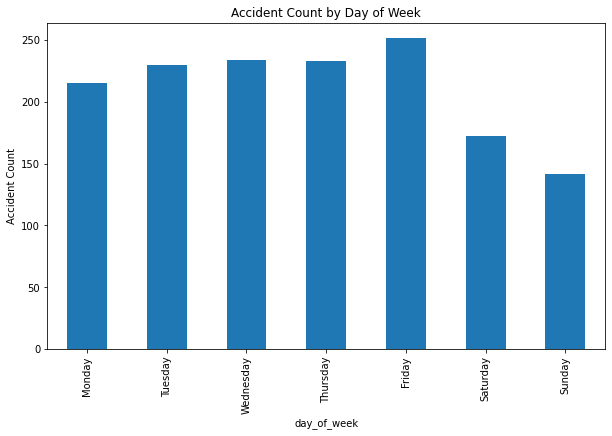

In [13]:
## No. of accident by week of the date 
# Group by day of the week and sum the accident counts
accidents_by_day = accident_num_df.groupby('day_of_week')['AccidentCount'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the results
plt.figure(figsize=(10,6))
accidents_by_day.plot(kind='bar')
plt.ylabel('Accident Count')
plt.title('Accident Count by Day of Week')
plt.show()

### Time Based Analysis

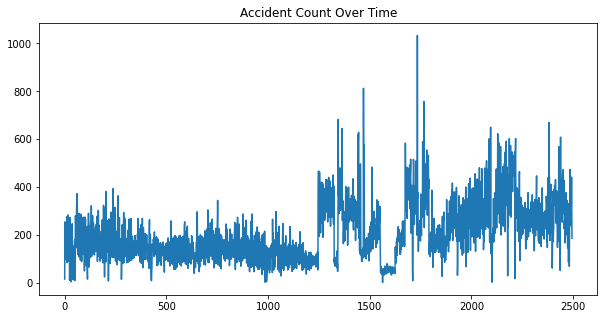

In [14]:
# Assuming 'Date' is already in datetime format

accident_num_df['AccidentCount'].plot(figsize=(10,5))
plt.title('Accident Count Over Time')
plt.show()

### Weather Condition Analysis:


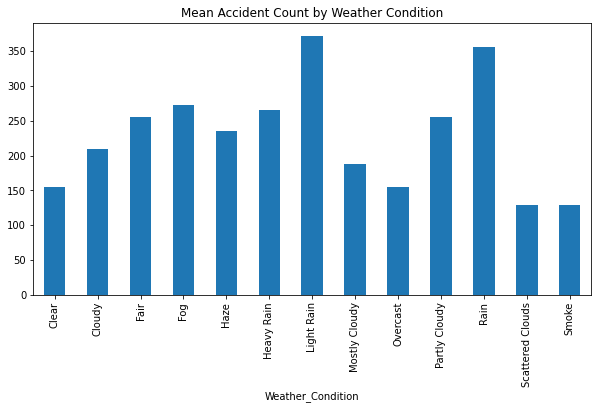

In [15]:
accident_num_df.groupby('Weather_Condition')['AccidentCount'].mean().plot(kind='bar', figsize=(10,5))
plt.title('Mean Accident Count by Weather Condition')
plt.show()

## Temperature Analysis

In [16]:
accident_num_df.head()

,Date,Weather_Condition,Temperature(F),Humidity(%),AccidentCount,day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Days
0,2016-03-22,Clear,64.0,58.0,16,Tuesday,False,False,False,False,False,True,False,0
1,2016-03-23,Clear,81.0,69.0,255,Wednesday,False,False,False,False,False,False,True,1
2,2016-03-24,Clear,83.0,69.0,246,Thursday,False,False,False,False,True,False,False,2
3,2016-03-25,Clear,81.0,80.0,148,Friday,True,False,False,False,False,False,False,3
4,2016-03-26,Clear,79.0,93.0,98,Saturday,False,False,True,False,False,False,False,4


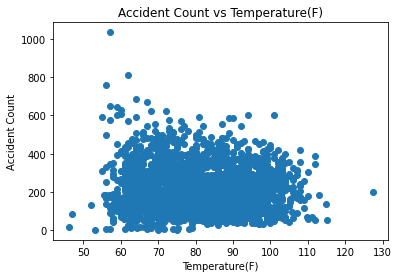

In [17]:
# Scatter plot with 'lagged 1 accident count'
plt.scatter(accident_num_df['Temperature(F)'], accident_num_df['AccidentCount'])
plt.title('Accident Count vs Temperature(F)')
plt.xlabel('Temperature(F)')
plt.ylabel('Accident Count')
plt.show()


## Humidity Analysis

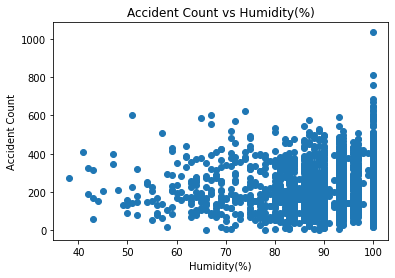

In [18]:
# Scatter plot with 'lagged 1 accident count'
plt.scatter(accident_num_df['Humidity(%)'], accident_num_df['AccidentCount'])
plt.title('Accident Count vs Humidity(%)')
plt.xlabel('Humidity(%)')
plt.ylabel('Accident Count')
plt.show()

### Lag Analysis

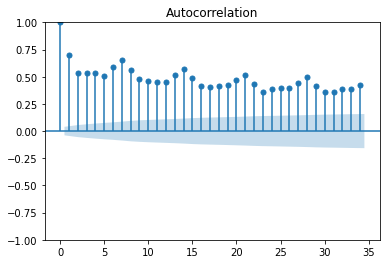

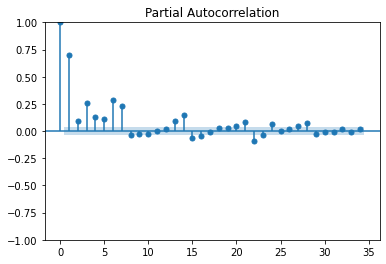

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot autocorrelation function
plot_acf(accident_num_df['AccidentCount'])
plt.show()

# Plot partial autocorrelation function
plot_pacf(accident_num_df['AccidentCount'])
plt.show()

## Base line model

1. One features approach

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


def model_train(train_size, accident_num_df, model):

    # Convert dates to the number of days since the first date

    # Create train test split
    split_point = int(len(accident_num_df) * train_size)
    train = accident_num_df.iloc[:split_point]
    test = accident_num_df.iloc[split_point:]

    # Initialize model

    # Fit the model
    model.fit(train.drop(columns= 'AccidentCount'), train['AccidentCount'])
    
    return train, test, model

def evaluator(test, model, model_name):
    # Make predictions
    test['PredictedAccidentCount'] = model.predict(test.drop(columns= 'AccidentCount'))


    
    # Assume test['PredictedAccidentCount'] are your predictions
    predictions = test['PredictedAccidentCount']

    
    # And test['AccidentCount'] are the true values
    true_values = test['AccidentCount']

    # Calculate the metrics
    mae = mean_absolute_error(true_values, predictions)
    mse = mean_squared_error(true_values, predictions)
    rmse = sqrt(mse)  # or np.sqrt(mse) with numpy
    r2 = r2_score(true_values, predictions)
    


    print(f'Root Mean Square Error (RMSE): {rmse:.2f}')
    
    print(f'R^2: {r2}')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    
    results = {
        'Model': model_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2
    }
    
    return results,test 

In [37]:
accident_num_df = accident_num_df.set_index('Date')

In [38]:
accident_num_df = accident_num_df

In [39]:
features = ['AccidentCount', 'Days' ]
train, test, model = model_train(0.8, accident_num_df[features], LinearRegression())
results1, test_result = evaluator(test[features], model, 'Linear Regression_v1_by day')

Root Mean Square Error (RMSE): 123.93
R^2: -0.3336138439268952
MAE: 94.5008432585282
MSE: 15358.97064040945
RMSE: 123.93131420431823


In [40]:
model_result = pd.DataFrame([results1])
model_result

,Model,MAE,MSE,RMSE,R-squared
0,Linear Regression_v1_by day,94.500843,15358.97064,123.931314,-0.333614


## Add features 

## Second Model (with seasonality)

In [41]:
features = ['AccidentCount','Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Days']
accident_num_df[features]

,AccidentCount,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Days
Date,,,,,,,,,
2016-03-22,16,False,False,False,False,False,True,False,0
2016-03-23,255,False,False,False,False,False,False,True,1
2016-03-24,246,False,False,False,False,True,False,False,2
2016-03-25,148,True,False,False,False,False,False,False,3
2016-03-26,98,False,False,True,False,False,False,False,4
...,...,...,...,...,...,...,...,...,...
2023-03-27,308,False,True,False,False,False,False,False,2561
2023-03-28,325,False,False,False,False,False,True,False,2562
2023-03-29,442,False,False,False,False,False,False,True,2563


In [42]:
train, test, model = model_train(0.8, accident_num_df[features], LinearRegression())
results, test_result = evaluator(test[features], model, 'Linear Regression_v2_day_of_the_week')


Root Mean Square Error (RMSE): 116.52
R^2: -0.17883072631769026
MAE: 87.47185024555013
MSE: 13576.36365127479
RMSE: 116.51765381810084


In [43]:
model_result = pd.concat([model_result, pd.DataFrame([results])], ignore_index=True)

In [44]:
model_result

,Model,MAE,MSE,RMSE,R-squared
0,Linear Regression_v1_by day,94.500843,15358.970640,123.931314,-0.333614
1,Linear Regression_v2_day_of_the_week,87.471850,13576.363651,116.517654,-0.178831


## Add Lagged Vaiable

In [45]:
# Generate lagged features
for i in range(1, 8):  # Here, we're creating 7 lagged features. You can adjust this number as needed.
    accident_num_df[f'accident_count_lag{i}'] = accident_num_df['AccidentCount'].shift(i)

accident_num_df = accident_num_df.dropna()

In [46]:
features_3 = ['AccidentCount', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Days','accident_count_lag1',
       'accident_count_lag2', 'accident_count_lag3', 'accident_count_lag4',
       'accident_count_lag5', 'accident_count_lag6', 'accident_count_lag7']

In [47]:
train, test, model = model_train(0.8, accident_num_df[features_3], LinearRegression())
results, test_result = evaluator(test[features_3], model, 'Linear Regression_v3_lagged_features')

Root Mean Square Error (RMSE): 89.38
R^2: 0.30766591506796814
MAE: 64.37317147306727
MSE: 7989.481461759496
RMSE: 89.38389934299967


In [48]:
model_result = pd.concat([model_result, pd.DataFrame([results])], ignore_index=True)

In [49]:
model_result

,Model,MAE,MSE,RMSE,R-squared
0,Linear Regression_v1_by day,94.500843,15358.970640,123.931314,-0.333614
1,Linear Regression_v2_day_of_the_week,87.471850,13576.363651,116.517654,-0.178831
2,Linear Regression_v3_lagged_features,64.373171,7989.481462,89.383899,0.307666


## Add weather data

In [50]:
one_hot_weather = pd.get_dummies(accident_num_df['Weather_Condition'])

In [51]:
accident_num_df = accident_num_df.merge(one_hot_weather, how = 'left', left_index=True, right_index=True)

In [56]:
features_4 = ['Temperature(F)', 'Humidity(%)', 'AccidentCount',
       'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Days', 'accident_count_lag1',
       'accident_count_lag2', 'accident_count_lag3', 'accident_count_lag4',
       'accident_count_lag5', 'accident_count_lag6', 'accident_count_lag7',
       'Clear_x','Cloudy_x','Fair_x','Fog_x','Haze_x','Heavy Rain_x',	'Light Rain_x','Mostly Cloudy_x','Overcast_x','Partly Cloudy_x','Rain_x']

In [57]:
accident_num_df

,Weather_Condition,Temperature(F),Humidity(%),AccidentCount,day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Days,Clear_x,Cloudy_x,Fair_x,Fog_x,Haze_x,Heavy Rain_x,Light Rain_x,Mostly Cloudy_x,Overcast_x,Partly Cloudy_x,Rain_x,Scattered Clouds_x,Smoke_x,accident_count_lag1,accident_count_lag2,accident_count_lag3,accident_count_lag4,accident_count_lag5,accident_count_lag6,accident_count_lag7,Clear_y,Cloudy_y,Fair_y,Fog_y,Haze_y,Heavy Rain_y,Light Rain_y,Mostly Cloudy_y,Overcast_y,Partly Cloudy_y,Rain_y,Scattered Clouds_y,Smoke_y
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-03-29,Clear,66.2,81.0,167,Tuesday,False,False,False,False,False,True,False,7,True,False,False,False,False,False,False,False,False,False,False,False,False,187.0,101.0,98.0,148.0,246.0,255.0,16.0,True,False,False,False,False,False,False,False,False,False,False,False,False
2016-03-30,Clear,66.2,83.0,251,Wednesday,False,False,False,False,False,False,True,8,True,False,False,False,False,False,False,False,False,False,False,False,False,167.0,187.0,101.0,98.0,148.0,246.0,255.0,True,False,False,False,False,False,False,False,False,False,False,False,False
2016-03-31,Clear,75.0,86.0,188,Thursday,False,False,False,False,True,False,False,9,True,False,False,False,False,False,False,False,False,False,False,False,False,251.0,167.0,187.0,101.0,98.0,148.0,246.0,True,False,False,False,False,False,False,False,False,False,False,False,False
2016-04-01,Clear,75.2,94.0,276,Friday,True,False,False,False,False,False,False,10,True,False,False,False,False,False,False,False,False,False,False,False,False,188.0,251.0,167.0,187.0,101.0,98.0,148.0,True,False,False,False,False,False,False,False,False,False,False,False,False
2016-04-02,Clear,82.9,87.0,85,Saturday,False,False,True,False,False,False,False,11,True,False,False,False,False,False,False,False,False,False,False,False,False,276.0,188.0,251.0,167.0,187.0,101.0,98.0,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27,Fair,76.0,82.0,308,Monday,False,True,False,False,False,False,False,2561,False,False,True,False,False,False,False,False,False,False,False,False,False,239.0,346.0,421.0,387.0,435.0,474.0,261.0,False,False,True,False,False,False,False,False,False,False,False,False,False
2023-03-28,Fair,74.0,82.0,325,Tuesday,False,False,False,False,False,True,False,2562,False,False,True,False,False,False,False,False,False,False,False,False,False,308.0,239.0,346.0,421.0,387.0,435.0,474.0,False,False,True,False,False,False,False,False,False,False,False,False,False
2023-03-29,Light Rain,65.0,100.0,442,Wednesday,False,False,False,False,False,False,True,2563,False,False,False,False,False,False,True,False,False,False,False,False,False,325.0,308.0,239.0,346.0,421.0,387.0,435.0,False,False,False,False,False,False,True,False,False,False,False,False,False


In [58]:
model_train

<function __main__.model_train(train_size, accident_num_df, model)>

In [59]:
train, test, model = model_train(0.8, accident_num_df[features_4], LinearRegression())
results, test_result = evaluator(test[features_4], model, 'Linear Regression_v4_weather_features')

Root Mean Square Error (RMSE): 85.66
R^2: 0.3641607966698258
MAE: 62.7851549660456
MSE: 7337.534924580626
RMSE: 85.65941235252916


In [60]:
model_result = pd.concat([model_result, pd.DataFrame([results])], ignore_index=True)

In [61]:
model_result

,Model,MAE,MSE,RMSE,R-squared
0,Linear Regression_v1_by day,94.500843,15358.970640,123.931314,-0.333614
1,Linear Regression_v2_day_of_the_week,87.471850,13576.363651,116.517654,-0.178831
2,Linear Regression_v3_lagged_features,64.373171,7989.481462,89.383899,0.307666
3,Linear Regression_v4_weather_features,62.785155,7337.534925,85.659412,0.364161


## Visualize Testing Prediction

In [ ]:
split_point = int(len(accident_num_df) * 0.8)
train = accident_num_df.iloc[:split_point]
train = train.set_index('Date')
test = accident_num_df.iloc[split_point:]
test = test.set_index('Date')



In [ ]:
test['PredictedAccidentCount'] = model.predict(test[features_4].drop(columns= 'AccidentCount'))


In [ ]:
test_preds = test['PredictedAccidentCount']

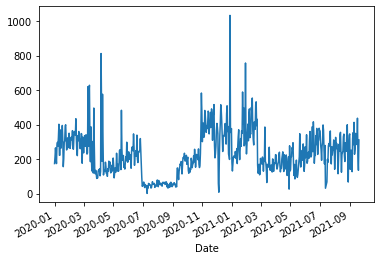

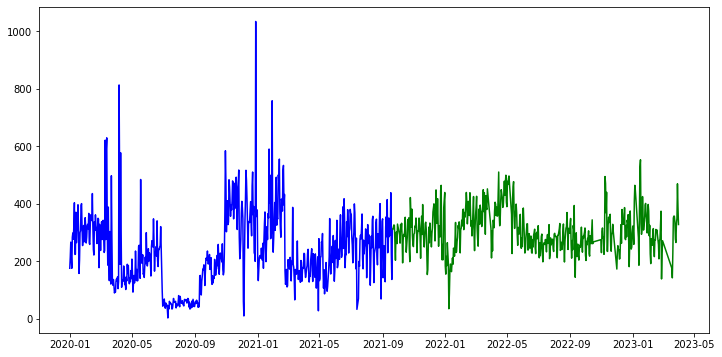

In [ ]:

# Convert predictions to pandas series with date index
train_preds_series = pd.Series(train['AccidentCount'])
# test_preds_series = pd.Series(test_preds, index=X_test.index)
train_preds_series['2020':].plot()

test_preds_series = pd.Series(test_preds)
# test_preds_series.plot()

plt.figure(figsize=(12, 6))
plt.plot(train_preds_series['2020':], color='blue', label='Actual Train')
plt.plot(test_preds_series, color='green', label='Actual Test')


## Other Model Testing

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso

models = [Ridge(),Lasso(), RandomForestRegressor(n_estimators=100), XGBRegressor(n_estimators=100), SVR(kernel = 'linear'), SVR(kernel = 'rbf')]

features_4 = ['Temperature(F)', 'Humidity(%)', 'AccidentCount',
       'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Days', 'accident_count_lag1',
       'accident_count_lag2', 'accident_count_lag3', 'accident_count_lag4',
       'accident_count_lag5', 'accident_count_lag6', 'accident_count_lag7',
       'Clear', 'Cloudy', 'Fair', 'Fog', 'Haze', 'Heavy Rain', 'Light Rain',
       'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Rain',
       'Scattered Clouds', 'Smoke']

for model in models:
    train, test, model = model_train(0.8, accident_num_df[features_4], model)
    results, test_result = evaluator(test[features_4], model, f'{model}_weather_features')
    model_result = pd.concat([model_result, pd.DataFrame([results])], ignore_index=True)

R^2: 0.3651536935316041
MAE: 62.905519781456135
MSE: 7352.803629176543
RMSE: 85.74849053584875
R^2: 0.3333398788399228
MAE: 64.00558061733047
MSE: 7721.2719178623975
RMSE: 87.87076827854868
R^2: 0.25705220035735254
MAE: 68.15754032258064
MSE: 8604.837457258065
RMSE: 92.76226310983398
R^2: 0.02668531956014597
MAE: 80.0226295225082
MSE: 11272.951644754095
RMSE: 106.17415714171737
R^2: 0.30618120252405345
MAE: 65.17567872558305
MSE: 8035.82429336542
RMSE: 89.64275929134165
R^2: -0.27270241284151653
MAE: 92.93665146778086
MSE: 14740.466825837484
RMSE: 121.41032421436607


In [ ]:
model_result

,Model,MAE,MSE,RMSE,R-squared
0,Linear Regression_v1_by day,94.449964,15351.844852,123.902562,-0.330325
1,Linear Regression_v2_day_of_the_week,87.133069,13521.675977,116.282742,-0.167471
2,Linear Regression_v3_lagged_features,64.450567,8000.124983,89.443418,0.309264
3,Linear Regression_v4_weather_features,62.879613,7347.239970,85.716043,0.365634
4,Ridge()_weather_features,62.905520,7352.803629,85.748491,0.365154
5,Lasso()_weather_features,64.005581,7721.271918,87.870768,0.333340
6,RandomForestRegressor()_weather_features,68.157540,8604.837457,92.762263,0.257052
7,"XGBRegressor(base_score=None, booster=None, ca...",80.022630,11272.951645,106.174157,0.026685
8,SVR(kernel='linear')_weather_features,65.175679,8035.824293,89.642759,0.306181
9,SVR()_weather_features,92.936651,14740.466826,121.410324,-0.272702


## Features Importance

In [ ]:
print('Coefficients: \n', model.coef_)

Coefficients: 
 [ 4.52189912e-01  3.24252218e-01  2.05310389e+01  3.69009833e+01
 -4.81563903e+01 -4.20357546e+01  3.50832013e+00  1.77151086e+01
  1.15366940e+01  4.70326046e-03  4.66244556e-01  6.88710590e-02
  9.84102616e-02  2.90590104e-02 -1.18382652e-02  1.33487692e-01
  1.14159486e-01 -1.91852754e+01 -1.40378703e+01 -1.83587255e+01
 -1.58043086e+00 -2.33550932e+01 -9.03114403e+01  1.17275033e+02
 -2.17777870e+01 -1.14644598e+01  6.50315028e+00  1.02828807e+02
 -2.48648060e+01 -1.67110158e+00]


In [ ]:
# Convert coefficients to absolute values
abs_coef = abs(model.coef_)

# Get feature names
feature_names = train.drop(columns= 'AccidentCount').columns

feature_importance_df = pd.DataFrame(list(zip(feature_names, abs_coef)), columns=['Feature', 'Importance'])

feature_importance_df = feature_importance_df.sort_values(by=['Importance'], ascending=False)

print(feature_importance_df)

                Feature  Importance
23           Light Rain  117.275033
27                 Rain  102.828807
22           Heavy Rain   90.311440
4              Saturday   48.156390
5                Sunday   42.035755
3                Monday   36.900983
28     Scattered Clouds   24.864806
21                 Haze   23.355093
24        Mostly Cloudy   21.777787
2                Friday   20.531039
17                Clear   19.185275
19                 Fair   18.358725
7               Tuesday   17.715109
18               Cloudy   14.037870
8             Wednesday   11.536694
25             Overcast   11.464460
26        Partly Cloudy    6.503150
6              Thursday    3.508320
29                Smoke    1.671102
20                  Fog    1.580431
10  accident_count_lag1    0.466245
0        Temperature(F)    0.452190
1           Humidity(%)    0.324252
15  accident_count_lag6    0.133488
16  accident_count_lag7    0.114159
12  accident_count_lag3    0.098410
11  accident_count_lag2    0

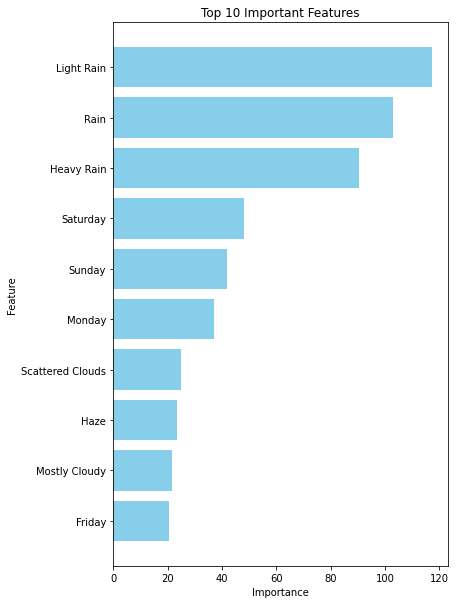

In [ ]:

import matplotlib.pyplot as plt

# Select top 10 features
top_10_features = feature_importance_df[:10]

# Create a bar plot
plt.figure(figsize=(6, 10))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()  # Invert y axis to have the highest value at the top
plt.show()